In [1]:
import numpy as np
import matplotlib.pyplot as P
from astropy.io import fits
from astropy import units as un
from astropy.table import Table
import scipy as S
from scipy import interpolate
%matplotlib inline

In [61]:
model = '/Users/becky/Projects/Green-Valley-Project/bc03/models/Padova1994/chabrier/ASCII/extracted_bc2003_hr_m42_chab_ssp.ised_ASCII'
data = np.loadtxt(model)
model_ages = data[0,1:]
model_lambda = data[1:,0]
model_fluxes = data[1:,1:]

In [3]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=71.0, Om0 = 0.26)
nsa_z = 0.0263343
ld = cosmo.luminosity_distance(nsa_z)

In [4]:
c = 299792.458 * (un.km/un.s)

In [5]:
f = c/(model_lambda*un.AA).to(un.km)

In [7]:
model_fluxes.shape

(6900, 221)

In [12]:
f.reshape(-1,1)

<Quantity [[  3.29442262e+16],
           [  3.18928147e+16],
           [  3.12283810e+16],
           ..., 
           [  2.49827048e+12],
           [  2.14137470e+12],
           [  1.87370286e+12]] 1 / s>

In [62]:
flux_density = (((model_fluxes*(un.solLum/un.AA)).to(un.erg/(un.s*un.AA)))*(model_lambda.reshape(-1,1)*un.AA)/f.reshape(-1,1).to(un.Hz))/(4*np.pi*(ld.to(un.cm)**2))

In [15]:
flux_density.shape

(6900, 221)

In [20]:
waves = np.repeat(model_lambda.reshape(-1,1), 221, axis=1)

In [23]:
mask1 = (np.logical_or(waves<3750, waves>3950))
mask2 = (np.logical_or(waves<4050, waves>4250))

In [63]:
flux_ds1 = np.ma.masked_array(flux_density, mask=mask1)
flux_ds2 = np.ma.masked_array(flux_density, mask=mask2)

In [64]:
upper = np.mean(flux_ds1, axis=0)
lower = np.mean(flux_ds2, axis=0)

In [65]:
D4000_m42 = lower/upper

Now we've calculated D4000 for the BC03 simple stellar populations at the model ages they provide, let's plot how D4000 changes with SSP age. We can compare this to Figure 2 of [Poggianti & Barbaro (1997)](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1997A%26A...325.1025P&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)

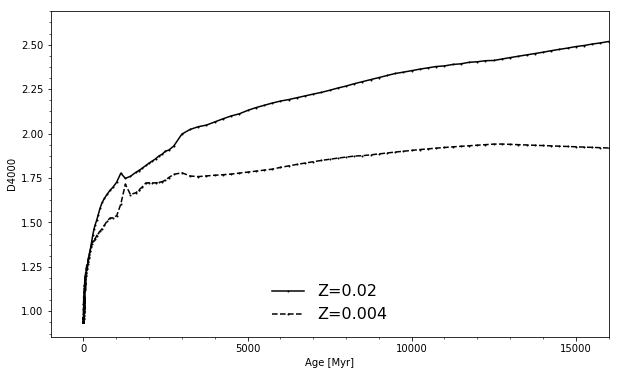

In [75]:
P.figure(figsize=(10,6))
P.plot(model_ages/1E6, D4000_m62, marker='o', ms=1, color='k', label='Z=0.02')
P.plot(model_ages/1E6, D4000_m42, marker='o', ms=1, color='k', linestyle='dashed', label='Z=0.004')
P.xlim(-1000, 16000)
P.xlabel('Age [Myr]')
P.ylabel('D4000')
P.minorticks_on()
P.xticks([0, 5000, 1E4, 1.5E4])
P.legend(frameon=False, fontsize=16, loc=8)

And we find that it is very similar to their Figure 2 - great sanity check! 